# Importando as bibliotecas e os dados

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('Titanic-Dataset.csv')

# EDA - Análise Exploratória dos Dados

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [71]:
print(df.shape)

(891, 12)


# Tratamento dos Dados

### Remoção dos NaN/NA


In [72]:
# Preencher a idade com a mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

# Preencher Cabin com 'Desconhecido'
df['Cabin'] = df['Cabin'].fillna('Desconhecido')

# Preencher Embarked com o valor mais frequente
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [73]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### Convertendo variáveis categóricas em números


In [74]:
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])

### Preparação dos dados para treinamento

In [75]:
# Selecionando as features e o target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Dividindo treino e teste (com 30% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Testando modelos

### Decision Tree

In [76]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred_tree)

### KNN

In [77]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

### Logistic Regression

In [78]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, y_pred_logreg)

# Comparação dos Modelos

## Acurácia

In [79]:
print(f'Acurácia - Árvore de Decisão: {decision_tree_accuracy:.2f}')
print(f'Acurácia - KNN: {knn_accuracy:.2f}')
print(f'Acurácia - Regressão Logística: {logistic_regression_accuracy:.2f}')

Acurácia - Árvore de Decisão: 0.75
Acurácia - KNN: 0.71
Acurácia - Regressão Logística: 0.81


## Matrizes de Confusão

Dos 891 registros mostrado na análise exploratória dos dados, 268 (30% dos testes) estão divididos na matrizes de confusão abaixo.

### Decision Tree

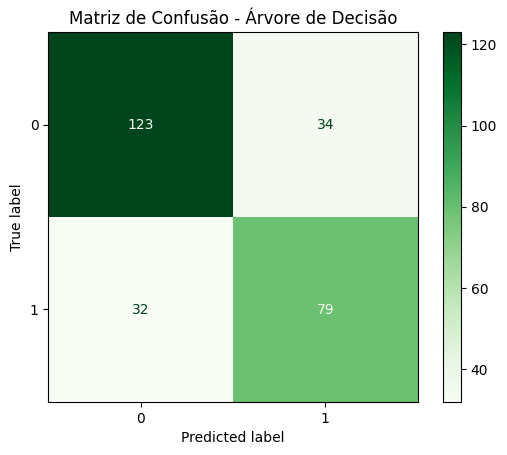

Verdadeiro Negativo (TN): 123
Falso Positivo (FP): 34
Falso Negativo (FN): 32
Verdadeiro Positivo (TP): 79


In [80]:
# Matriz de confusão
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Visualização
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree.classes_)
disp_tree.plot(cmap='Greens')

plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

tn, fp, fn, tp = cm_tree.ravel()
print(f'Verdadeiro Negativo (TN): {tn}')
print(f'Falso Positivo (FP): {fp}')
print(f'Falso Negativo (FN): {fn}')
print(f'Verdadeiro Positivo (TP): {tp}')

### KNN

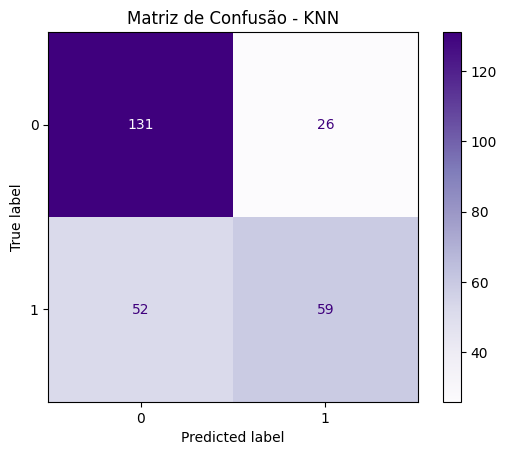

Verdadeiro Negativo (TN): 131
Falso Positivo (FP): 26
Falso Negativo (FN): 52
Verdadeiro Positivo (TP): 59


In [81]:
# Matriz de confusão
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualização
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot(cmap='Purples')
plt.title('Matriz de Confusão - KNN')
plt.show()

tn, fp, fn, tp = cm_knn.ravel()
print(f'Verdadeiro Negativo (TN): {tn}')
print(f'Falso Positivo (FP): {fp}')
print(f'Falso Negativo (FN): {fn}')
print(f'Verdadeiro Positivo (TP): {tp}')

### Logistic Regression



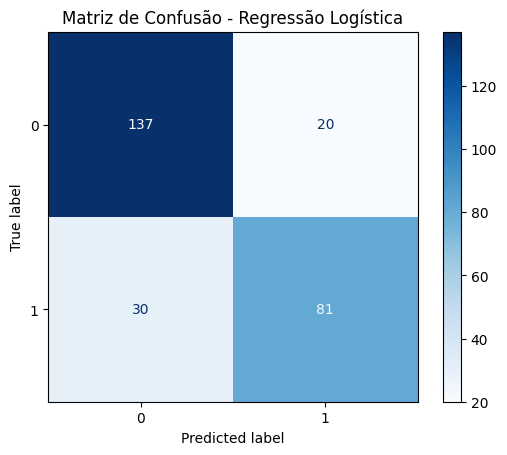

Verdadeiro Negativo (TN): 137
Falso Positivo (FP): 20
Falso Negativo (FN): 30
Verdadeiro Positivo (TP): 81


In [82]:
# Matriz de confusão
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Visualização
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

tn, fp, fn, tp = cm_logreg.ravel()
print(f'Verdadeiro Negativo (TN): {tn}')
print(f'Falso Positivo (FP): {fp}')
print(f'Falso Negativo (FN): {fn}')
print(f'Verdadeiro Positivo (TP): {tp}')